In [ ]:
from scipy import stats
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Conv2D, MaxPooling2D, Flatten, Dropout, Conv1D, MaxPooling1D, Activation
import matplotlib.pyplot as plt
from keras.layers import TimeDistributed

from keras.layers import TimeDistributed
from tensorflow.keras.optimizers import Adam, Nadam, SGD
from tensorflow.keras.layers import Lambda
from tensorflow.keras import backend as K
from scipy import stats
import statistics as sts
from scipy.stats.mstats import gmean
from keras.layers import concatenate
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy import stats
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Conv2D, MaxPooling2D, Flatten, Dropout
import matplotlib.pyplot as plt
from keras.layers import TimeDistributed
from tensorflow.keras.layers import Lambda
from tensorflow.keras import backend as K
from scipy import stats
import statistics as sts
from scipy.stats.mstats import gmean
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Conv2D, MaxPooling2D, Flatten, Dropout, GRU, Conv1D
import matplotlib.pyplot as plt
from keras.layers import TimeDistributed
from tensorflow.keras.layers import Lambda
from tensorflow.keras import backend as K
from scipy import stats
import statistics as sts
from scipy.stats.mstats import gmean
from tensorflow.keras.layers import BatchNormalization
from keras import backend as f

plt.style.use('fivethirtyeight')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/XAUUSD_M30.csv',
                 thousands=',',
                 decimal='.')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99968 entries, 0 to 99967
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1614.15    99968 non-null  float64
 1   1614.16    99968 non-null  float64
 2   1613.35    99968 non-null  float64
 3   1613.35.1  99968 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [ ]:
df.shape

(99968, 4)

In [ ]:
df

,1614.15,1614.16,1613.35,1613.35.1
0,1613.37,1614.51,1613.33,1613.95
1,1613.91,1615.06,1612.70,1613.05
2,1613.02,1613.41,1611.74,1612.66
3,1612.76,1614.20,1612.53,1613.22
4,1613.19,1614.30,1612.98,1613.73
...,...,...,...,...
99963,1835.03,1837.88,1834.67,1837.65
99964,1837.68,1838.75,1836.66,1836.81
99965,1836.75,1837.29,1835.58,1835.94
99966,1835.89,1836.19,1834.59,1835.87


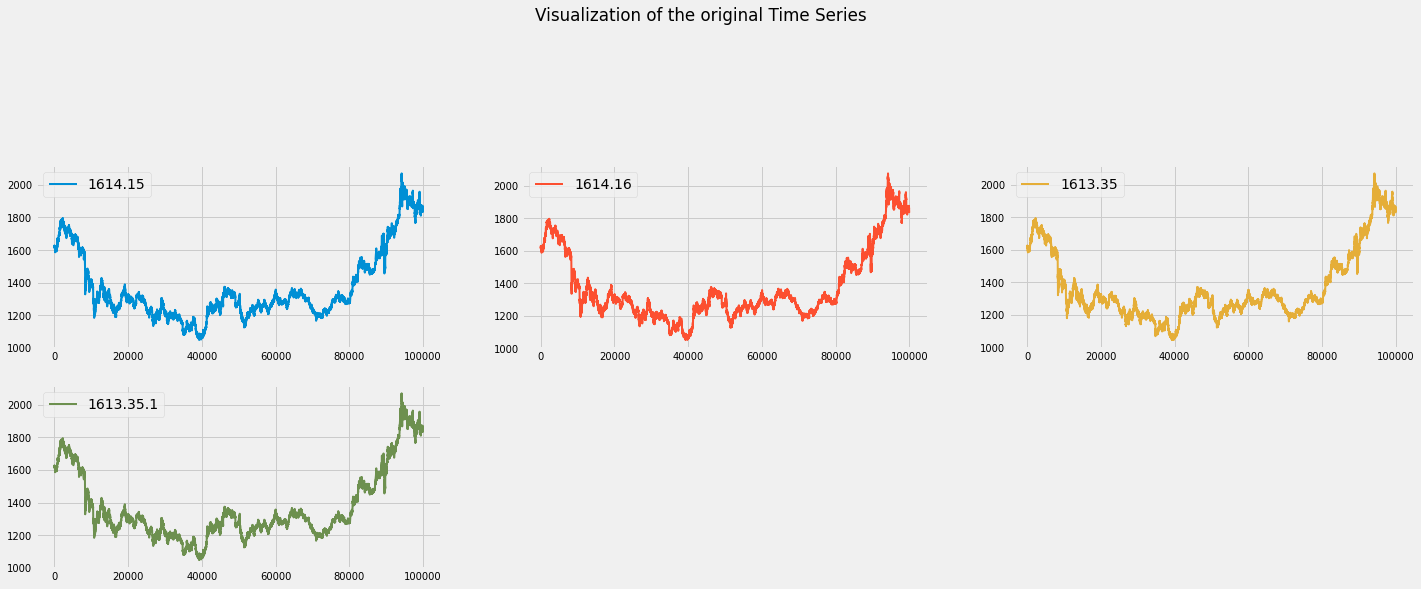

In [ ]:
plt.style.use('fivethirtyeight')
df.plot(subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of the original Time Series')
plt.show()

In [ ]:
df['open-high'] = df['1614.15'] - df['1614.16']
df['open-low'] = df['1614.15'] - df['1613.35']
df['high-low'] = df['1614.16'] - df['1613.35']

df['close-open'] = df['1613.35.1'] - df['1614.15']
df['high-close'] = df['1614.16'] - df['1613.35.1']
df['close-low'] = df['1613.35.1'] - df['1613.35']

df['03m-SMA-Open']=df['1614.15'].rolling(window=3).mean()
df['05m-SMA-Open']=df['1614.15'].rolling(window=5).mean()
df['07m-SMA-Open']=df['1614.15'].rolling(window=7).mean()

df['03m-SMA-High']=df['1614.16'].rolling(window=3).mean()
df['05m-SMA-High']=df['1614.16'].rolling(window=5).mean()
df['07m-SMA-High']=df['1614.16'].rolling(window=7).mean()

df['03m-SMA-Low']=df['1613.35'].rolling(window=3).mean()
df['05m-SMA-Low']=df['1613.35'].rolling(window=5).mean()
df['07m-SMA-Low']=df['1613.35'].rolling(window=7).mean()

df['03m-SMA-Close']=df['1613.35.1'].rolling(window=3).mean()
df['05m-SMA-Close']=df['1613.35.1'].rolling(window=5).mean()
df['07m-SMA-Close']=df['1613.35.1'].rolling(window=7).mean()


def wma(df, column='close', n=20, add_col=False):

    weights = np.arange(1, n + 1)
    wmas = df[column].rolling(n).apply(lambda x: np.dot(x, weights) /
                                       weights.sum(), raw=True).to_list()

    if add_col == True:
        df[f'{column}_WMA_{n}'] = wmas
        return df
    else:
        return wmas

df['03m-WMA-Open'] = wma(df, column='1614.15',n=3,add_col=False)
df['05m-WMA-Open'] = wma(df, column='1614.15',n=5,add_col=False)
df['07m-WMA-Open'] = wma(df, column='1614.15',n=7,add_col=False)

df['03m-WMA-High'] = wma(df, column='1614.16',n=3,add_col=False)
df['05m-WMA-High'] = wma(df, column='1614.16',n=5,add_col=False)
df['07m-WMA-High'] = wma(df, column='1614.16',n=7,add_col=False)

df['03m-WMA-Low'] = wma(df, column='1613.35',n=3,add_col=False)
df['05m-WMA-Low'] = wma(df, column='1613.35',n=5,add_col=False)
df['07m-WMA-Low'] = wma(df, column='1613.35',n=7,add_col=False)

df['03m-WMA-Close'] = wma(df, column='1613.35.1',n=3,add_col=False)
df['05m-WMA-Close'] = wma(df, column='1613.35.1',n=5,add_col=False)
df['07m-WMA-Close'] = wma(df, column='1613.35.1',n=7,add_col=False)

Open_26_ewma = df['1614.15'].ewm(span=26, min_periods=0, adjust=True, ignore_na=True).mean()
Open_12_ewma = df['1614.15'].ewm(span=12, min_periods=0, adjust=True, ignore_na=True).mean()
df['26ema'] = Open_26_ewma
df['12ema'] = Open_12_ewma
df['MACD_Open'] = (df['12ema'] - df['26ema'])

High_26_ewma = df['1614.16'].ewm(span=26, min_periods=0, adjust=True, ignore_na=True).mean()
High_12_ewma = df['1614.16'].ewm(span=12, min_periods=0, adjust=True, ignore_na=True).mean()
df['26ema'] = High_26_ewma
df['12ema'] = High_12_ewma
df['MACD_High'] = (df['12ema'] - df['26ema'])

Low_26_ewma = df['1613.35'].ewm(span=26, min_periods=0, adjust=True, ignore_na=True).mean()
Low_12_ewma = df['1613.35'].ewm(span=12, min_periods=0, adjust=True, ignore_na=True).mean()
df['26ema'] = Low_26_ewma
df['12ema'] = Low_12_ewma
df['MACD_Low'] = (df['12ema'] - df['26ema'])

close_26_ewma = df['1613.35.1'].ewm(span=26, min_periods=0, adjust=True, ignore_na=True).mean()
close_12_ewma = df['1613.35.1'].ewm(span=12, min_periods=0, adjust=True, ignore_na=True).mean()
df['26ema'] = close_26_ewma
df['12ema'] = close_12_ewma
df['MACD_Close'] = (df['12ema'] - df['26ema'])

def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

df['RSI_Open_3'] = computeRSI(df['1614.15'], 3)
df['RSI_Open_5'] = computeRSI(df['1614.15'], 5)
df['RSI_Open_7'] = computeRSI(df['1614.15'], 7)

df['RSI_High_3'] = computeRSI(df['1614.16'], 3)
df['RSI_High_5'] = computeRSI(df['1614.16'], 5)
df['RSI_High_7'] = computeRSI(df['1614.16'], 7)

df['RSI_Low_3'] = computeRSI(df['1613.35'], 3)
df['RSI_Low_5'] = computeRSI(df['1613.35'], 5)
df['RSI_Low_7'] = computeRSI(df['1613.35'], 7)

df['RSI_Close_3'] = computeRSI(df['1613.35.1'], 3)
df['RSI_Close_5'] = computeRSI(df['1613.35.1'], 5)
df['RSI_Close_7'] = computeRSI(df['1613.35.1'], 7)

In [ ]:
df = df.rename(columns={"1614.15": "Open","1614.16":  "High","1613.35": "Low" ,"1613.35.1": "Close"})

In [ ]:
df

,Open,High,Low,Close,open-high,open-low,high-low,close-open,high-close,close-low,03m-SMA-Open,05m-SMA-Open,07m-SMA-Open,03m-SMA-High,05m-SMA-High,07m-SMA-High,03m-SMA-Low,05m-SMA-Low,07m-SMA-Low,03m-SMA-Close,05m-SMA-Close,07m-SMA-Close,03m-WMA-Open,05m-WMA-Open,07m-WMA-Open,03m-WMA-High,05m-WMA-High,07m-WMA-High,03m-WMA-Low,05m-WMA-Low,07m-WMA-Low,03m-WMA-Close,05m-WMA-Close,07m-WMA-Close,26ema,12ema,MACD_Open,MACD_High,MACD_Low,MACD_Close,RSI_Open_3,RSI_Open_5,RSI_Open_7,RSI_High_3,RSI_High_5,RSI_High_7,RSI_Low_3,RSI_Low_5,RSI_Low_7,RSI_Close_3,RSI_Close_5,RSI_Close_7
0,1613.37,1614.51,1613.33,1613.95,-1.14,0.04,1.18,0.58,0.56,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1613.950000,1613.950000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1613.91,1615.06,1612.70,1613.05,-1.15,1.21,2.36,-0.86,2.01,0.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1613.482692,1613.462500,0.012115,0.012340,-0.014135,-0.020192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1613.02,1613.41,1611.74,1612.66,-0.39,1.28,1.67,-0.36,0.75,0.92,1613.433333,NaN,NaN,1614.326667,NaN,NaN,1612.590000,NaN,NaN,1613.220000,NaN,NaN,1613.375000,NaN,NaN,1614.143333,NaN,NaN,1612.325000,NaN,NaN,1613.005000,NaN,NaN,1613.187107,1613.149284,-0.012161,-0.035443,-0.047780,-0.037823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1612.76,1614.20,1612.53,1613.22,-1.44,0.23,1.67,0.46,0.98,0.69,1613.230000,NaN,NaN,1614.223333,NaN,NaN,1612.323333,NaN,NaN,1612.976667,NaN,NaN,1613.038333,NaN,NaN,1614.080000,NaN,NaN,1612.295000,NaN,NaN,1613.005000,NaN,NaN,1613.196302,1613.171606,-0.032292,-0.027784,-0.033389,-0.024696,21.951220,NaN,NaN,48.464341,NaN,NaN,46.198830,NaN,NaN,45.901639,NaN,NaN
4,1613.19,1614.30,1612.98,1613.73,-1.11,0.21,1.32,0.54,0.57,0.75,1612.990000,1613.250,NaN,1613.970000,1614.296,NaN,1612.416667,1612.656,NaN,1613.203333,1613.322,NaN,1613.018333,1613.149333,NaN,1614.118333,1614.210667,NaN,1612.623333,1612.598000,NaN,1613.381667,1613.304000,NaN,1613.320069,1613.323320,-0.025440,-0.019059,-0.006959,0.003251,50.910834,NaN,NaN,51.848249,NaN,NaN,61.425577,NaN,NaN,66.750630,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99963,1835.03,1837.88,1834.67,1837.65,-2.85,0.36,3.21,2.62,0.23,2.98,1834.466667,1835.730,1835.734286,1836.730000,1837.632,1838.121429,1833.113333,1833.662,1833.874286,1835.296667,1835.762,1836.374286,1834.443333,1835.097333,1835.486786,1837.001667,1837.236667,1837.588929,1833.610000,1833.588667,1833.767500,1836.038333,1835.740000,1835.962857,1841.595584,1837.299332,-4.668171,-4.656314,-4.356563,-4.296252,46.714797,43.120673,41.296374,55.919998,44.881340,39.865499,64.178375,54.326549,48.941532,67.651332,55.761656,50.221483
99964,1837.68,1838.75,1836.66,1836.81,-1.07,1.02,2.09,-0.87,1.94,0.15,1835.303333,1835.766,1836.387143,1837.563333,1837.426,1837.977143,1834.770000,1834.104,1834.457143,1836.500000,1835.574,1836.150000,1836.050000,1835.747333,1835.973214,1838.011667,1837.609333,1837.746071,1835.383333,1834.588000,1834.463929,1836.795000,1836.089333,1836.071786,1841.241096,1837.224050,-4.286625,-4.366795,-3.874534,-4.017047,67.851340,55.908053,50.322216,66.465892,51.885929,44.963450,77.246869,63.593424,55.888508,56.902260,51.209700,47.526309
99965,1836.75,1837.29,1835.58,1835.94,-0.54,1.17,1.71,-0.81,1.35,0.36,1836.486667,1835.566,1836.154286,1837.973333,1837.246,1837.742857,1835.636667,1834.316,1834.364286,1836.800000,1835.728,1835.937143,1836.773333,1836.075333,1836.063929,1837.875000,1837.564000,1837.574286,1835.788333,1835.080000,1834.744643,1836.515000,1836.211333,1836.019286,1840.848423,1837.026504,-4.013032,-4.206668,-3.538875,-3.821919,56.130593,50.889249,47.341964,41.483212,40.965377,38.562840,59.558558,55.899341,51.455699,

In [ ]:
#df = np.array(df)

#for i in range(4,44):
#  for j in range(len(df)):
#    if np.isnan(df[j,i]):
#      df[j,i]=0

#df = pd.DataFrame(df)

In [ ]:
import seaborn as sns

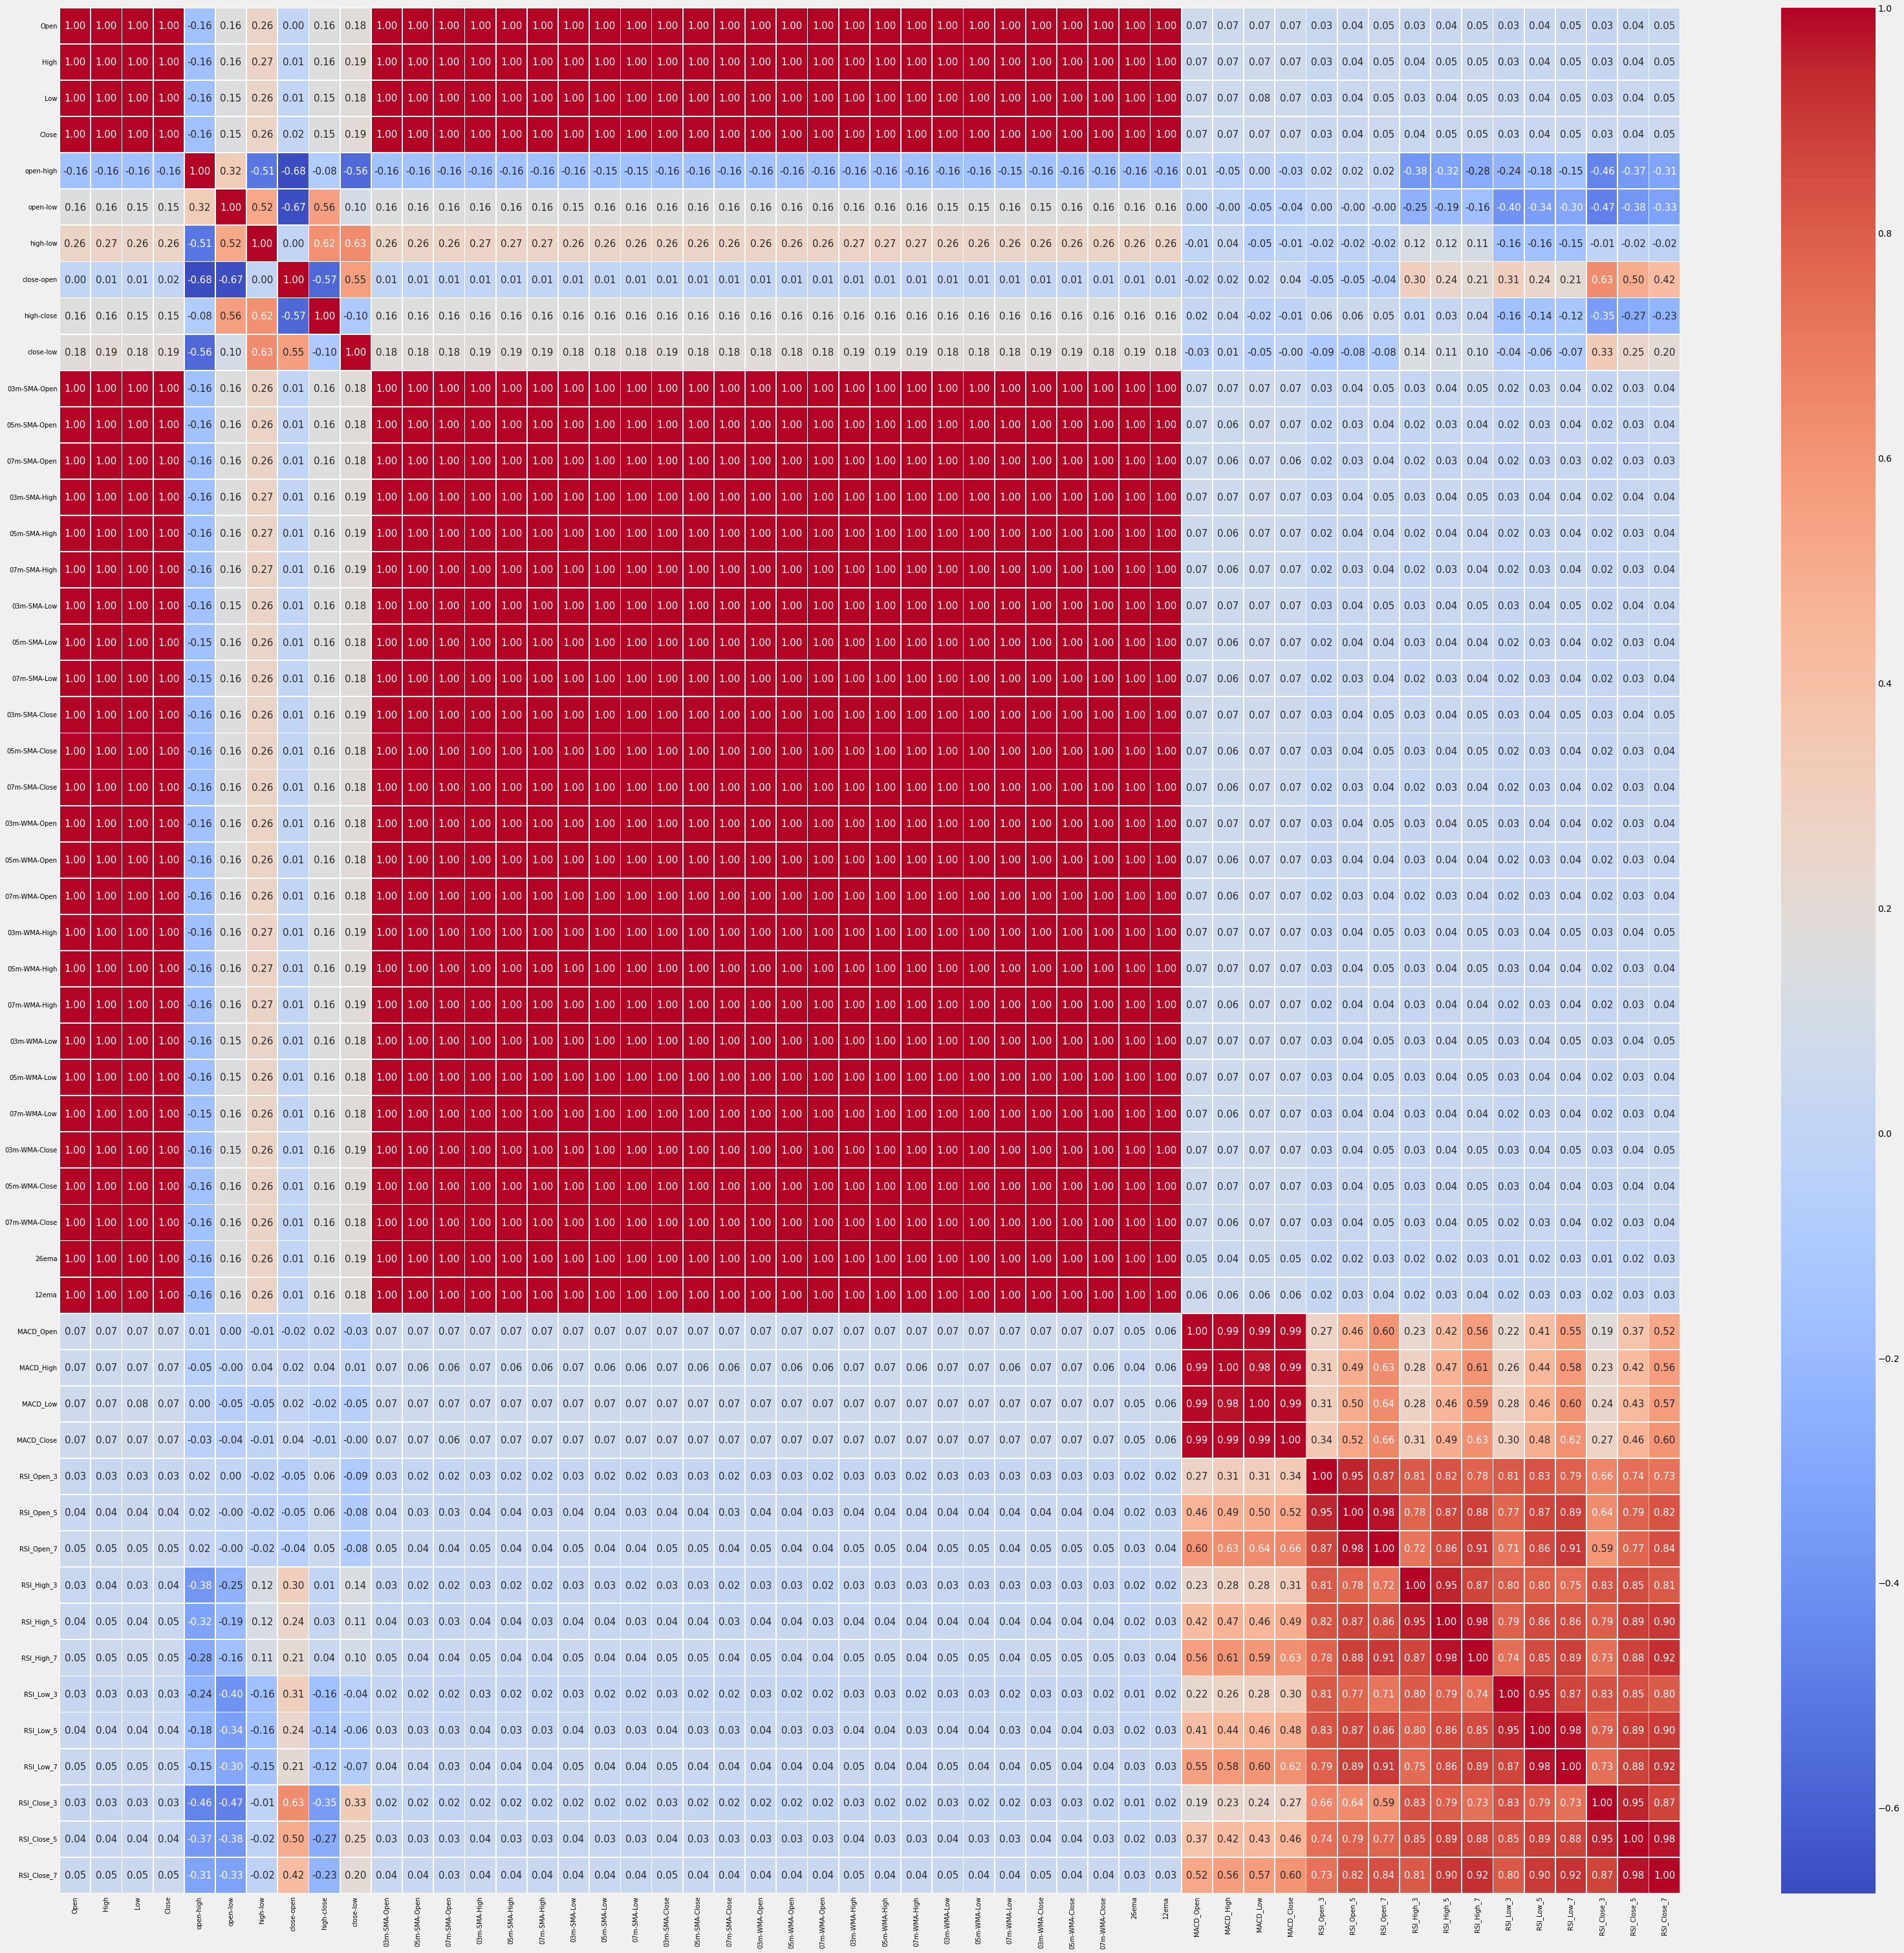

In [ ]:
corr_matrix = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(50,50))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.8,
            annot_kws={"size": 15}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()